# Analysis of warnings in Dnipro region from March to April 2022
The following notebook presents the analysis of warnings in Dnipro region from March to April 2022. In presents works we found the number of warnings during that period, the changes of intensity during that period, duration and distribution of warnings per hours, per weekday and per months. The raw data is collected from telegram warning channel by grabber.py program and saved in json format in data_raw directory. After that, parser.py parses that raw data, cleanes, accumulates and makes the data simple for analysis. That data will be stored in data directory and ready for analysis.

### Table of contents
#### 1. Import libraries
#### 2. Import data
##### 2.1 Reading the data
##### 2.2 Selecting the needed region and global variables
#### 3. Execution of calculations
##### 3.1 Analysis of number of warnings
 a lot of graphics and text
##### 3.2 Analysis of duration of warnings
 a lot of graphics and text
#### 4. Scope

### 1. import libraries
for graphic - plotly 
for data - pandas

In [1]:
# data
import pandas as pd #import library
import numpy as np
# graph
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# sys
import sys
import os

### 2. Import the data
#### 2.1 reading the data

The necessary variables for analysis in dataset:
from raw_data:
message - the columns which contains the text of message
datetime - the date and the time of message
from data:
region - the region of that message
date, time, month, day, weekday - from datetime
weekday_num - number format of weekday
war_day - the day of our holy war
war_week - the week of our holy war
is_warning - is message is start of warning
is_end - is message is end of warning 
unique_warning - from channels we can see that start of warning can be duplicated, that variable return the first of that warnings
last_end - the same as unique_warning, but for ends of warnings and takes the last of that
time_delta_min - the duration of one warning (from unique warning until last_end)

In [2]:
# directory path
os.chdir('D:/stat/telegram_trevoga')
AppPath = sys.path[0]
data_folder = os.getcwd() + '/data'
file = 'data.csv'

# printing the ways
print(data_folder)
print(AppPath)
# to raw data folder
os.chdir(data_folder)
# import the data
df = pd.read_csv(file, sep='~', parse_dates=True)
# converting dtypes
downcast = 'integer'
errors = 'coerce'
# to int
df['id']= pd.to_numeric(df['id'], downcast=downcast, errors=errors)
df['max_id'] = pd.to_numeric(df['max_id'], downcast=downcast, errors=errors)
df['min_id'] = pd.to_numeric(df['min_id'], downcast=downcast, errors=errors)
df['is_end'] = pd.to_numeric(df['is_end'], downcast=downcast, errors=errors)
df['is_warning'] = pd.to_numeric(df['is_warning'], downcast=downcast, errors=errors)
df['time_delta_min'] = df['time_delta_min'].astype('int64',errors='ignore')
# dt
df['date'] = pd.to_datetime(df['date'])
# float

df

D:\stat\telegram_trevoga/data
D:\stat\telegram_trevoga\runs


,id,last_end,unique_warning,index,_,datetime,message,ttl_period,action,region,...,month,war_day,war_week,weekday_num,weekday,is_end,is_warning,min_id,max_id,time_delta_min
0,400,True,False,0,Message,2022-04-30 15:30:05+00:00,Отбой тревоги ✅\n\nКанал тревог: t.me/odessa_s...,NaN,NaN,Одеська,...,April,66,9,5,Saturday,1,0,NaN,400.0,25.0
1,398,False,True,2,Message,2022-04-30 15:04:56+00:00,🚨ОДЕССА И ОБЛАСТЬ — ВОЗДУШНАЯ ТРЕВОГА!\n\nВсе ...,NaN,NaN,Одеська,...,April,66,9,5,Saturday,0,1,398.0,NaN,NaN
2,396,True,False,4,Message,2022-04-29 09:50:51+00:00,Отбой тревоги ✅\n\nКанал тревог: t.me/odessa_s...,NaN,NaN,Одеська,...,April,65,9,4,Friday,1,0,NaN,396.0,32.0
3,395,False,True,5,Message,2022-04-29 09:18:38+00:00,🚨ОДЕССА И ОБЛАСТЬ — ВОЗДУШНАЯ ТРЕВОГА!\n\nВсе ...,NaN,NaN,Одеська,...,April,65,9,4,Friday,0,1,395.0,NaN,NaN
4,394,True,False,6,Message,2022-04-28 18:04:28+00:00,Отбой тревоги ✅,NaN,NaN,Одеська,...,April,64,9,3,Thursday,1,0,NaN,394.0,188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10005,8,False,False,1088,Message,2022-02-27 17:40:33+00:00,"‼️‼️‼️Увага! Оголошено тривогу, усім пройти в ...",NaN,NaN,Донецька,...,February,4,0,6,Sunday,0,1,4.0,NaN,NaN
10006,7,False,False,1089,Message,2022-02-27 17:40:30+00:00,"‼️‼️‼️Увага! Оголошено тривогу, усім пройти в ...",NaN,NaN,Донецька,...,February,4,0,6,Sunday,0,1,4.0,NaN,NaN
10007,6,False,False,1090,Message,2022-02-27 17:40:27+00:00,"‼️‼️‼️Увага! Оголошено тривогу, усім пройти в ...",NaN,NaN,Донецька,...,February,4,0,6,Sunday,0,1,4.0,NaN,NaN
10008,5,False,False,1091,Message,2022-02-27 17:40:24+00:00,"‼️‼️‼️Увага! Оголошено тривогу, усім пройти в ...",NaN,NaN,Донецька,...,February,4,0,6,Sunday,0,1,4.0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10010 entries, 0 to 10009
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10010 non-null  int16         
 1   last_end        10010 non-null  bool          
 2   unique_warning  10010 non-null  bool          
 3   index           10010 non-null  int64         
 4   _               10010 non-null  object        
 5   datetime        10010 non-null  object        
 6   message         10010 non-null  object        
 7   ttl_period      0 non-null      float64       
 8   action          0 non-null      float64       
 9   region          10010 non-null  object        
 10  command_center  10010 non-null  object        
 11  time            10010 non-null  object        
 12  hour            10010 non-null  int64         
 13  date            10010 non-null  datetime64[ns]
 14  day             10010 non-null  int64         
 15  mo

In [4]:
print('Number of starts of warnings: ',df[df['unique_warning'] == True].shape[0])
print('Numberof ends of warnings: ', df[df['last_end'] == True].shape[0])

Number of starts of warnings:  3523
Numberof ends of warnings:  3525


#### 2.2 Selecting the needed region

In [5]:
# take from 1 march
df_region = df[(df['region'] == 'Дніпровська') & (df['date']>= pd.to_datetime('3/1/2022')) & (
                                                  df['date']<= pd.to_datetime('4/30/2022'))]
# global var
region = 'Dnipro'
last_date = df_region['datetime'].max()
pio.orca.config.executable = "C:/Users\Vlad\AppData\Local\Programs\orca\orca.exe"

df_region

,id,last_end,unique_warning,index,_,datetime,message,ttl_period,action,region,...,month,war_day,war_week,weekday_num,weekday,is_end,is_warning,min_id,max_id,time_delta_min
1908,529,True,False,0,Message,2022-04-30 20:09:55+00:00,✅✅✅ Увага! ВІДБІЙ ТРИВОГИ ✅✅✅23:09,NaN,NaN,Дніпровська,...,April,66,9,5,Saturday,1,0,NaN,529.0,34.0
1909,528,False,True,1,Message,2022-04-30 19:34:57+00:00,"‼️‼️‼️Увага! Оголошено тривогу, всім пройти в ...",NaN,NaN,Дніпровська,...,April,66,9,5,Saturday,0,1,528.0,NaN,NaN
1910,527,True,False,2,Message,2022-04-30 13:35:28+00:00,✅✅✅ Увага! ВІДБІЙ ТРИВОГИ ✅✅✅16:35\n \n‼️Якщо ...,NaN,NaN,Дніпровська,...,April,66,9,5,Saturday,1,0,NaN,527.0,50.0
1911,526,False,True,3,Message,2022-04-30 12:45:09+00:00,"‼️‼️‼️Увага! Оголошено тривогу, всім пройти в ...",NaN,NaN,Дніпровська,...,April,66,9,5,Saturday,0,1,526.0,NaN,NaN
1912,525,True,False,4,Message,2022-04-30 11:14:43+00:00,✅✅✅ Увага! ВІДБІЙ ТРИВОГИ ✅✅✅14:14\n \n‼️Якщо ...,NaN,NaN,Дніпровська,...,April,66,9,5,Saturday,1,0,NaN,525.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,26,True,False,495,Message,2022-03-01 08:25:19+00:00,✅✅✅ Увага! ВІДБІЙ ТРИВОГИ ✅✅✅10:25,NaN,NaN,Дніпровська,...,March,6,0,1,Tuesday,1,0,NaN,26.0,19.0
2394,25,False,False,496,Message,2022-03-01 08:16:44+00:00,"‼️‼️‼️Увага! Оголошено тривогу, усім пройти в ...",NaN,NaN,Дніпровська,...,March,6,0,1,Tuesday,0,1,24.0,NaN,NaN
2395,24,False,True,497,Message,2022-03-01 08:06:03+00:00,"‼️‼️‼️Увага! Оголошено тривогу, усім пройти в ...",NaN,NaN,Дніпровська,...,March,6,0,1,Tuesday,0,1,24.0,NaN,NaN
2396,23,True,False,498,Message,2022-03-01 06:49:10+00:00,✅✅✅ Увага! ВІДБІЙ ТРИВОГИ ✅✅✅08:49,NaN,NaN,Дніпровська,...,March,6,0,1,Tuesday,1,0,NaN,23.0,26.0


#### Print the last date

In [6]:
last_date

'2022-04-30 20:09:55+00:00'

### 3. Execution of calculations
### 3.1 Analysis of number of warning
#### 3.1.1 Intensity of warnings by days 
##### *From 4 until 14 March the number of warnings will be decrease because the any channels did not work at that time.

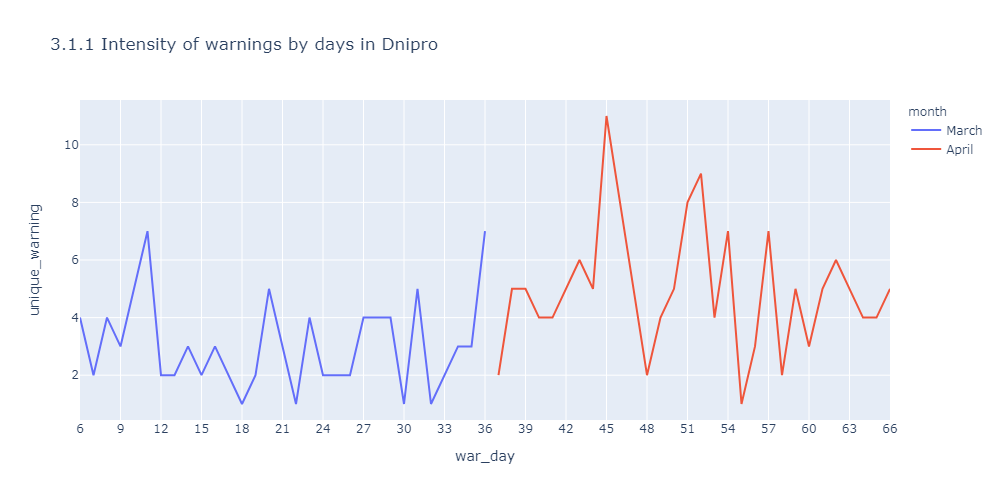

In [7]:
# selecting 
warday = df_region[['month_num','month','war_day', 'unique_warning']]
# grouping
warday = warday.groupby(by=['month_num','month','war_day']).sum()
warday = warday.reset_index()
# plotting
warday_line =  px.line(warday, x='war_day', y="unique_warning", color="month",
                      title=f'3.1.1 Intensity of warnings by days in {region}')
warday_line.update_xaxes(tick0=0, dtick=3)
warday_line.show('png', width=1000, height=500)

#### 3.1.2 The absolute number of warnings per month

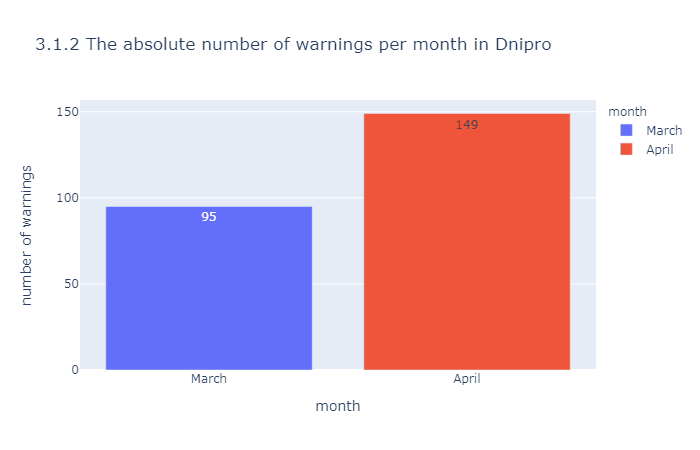

In [8]:
# selecting
month = df_region[['unique_warning', 'month', 'month_num']]
# grouping 
month = month.groupby(by=['month_num', 'month']).sum()
month = month.reset_index()
# printing
month['number of warnings'] = month['unique_warning']
month_bar =  px.bar(month, x="month", y="number of warnings", color="month", 
                     title=f'3.1.2 The absolute number of warnings per month in {region}',
                    text='number of warnings')
month_bar.show('png')

#### 3.1.3 The absolute number of warnings per weekday

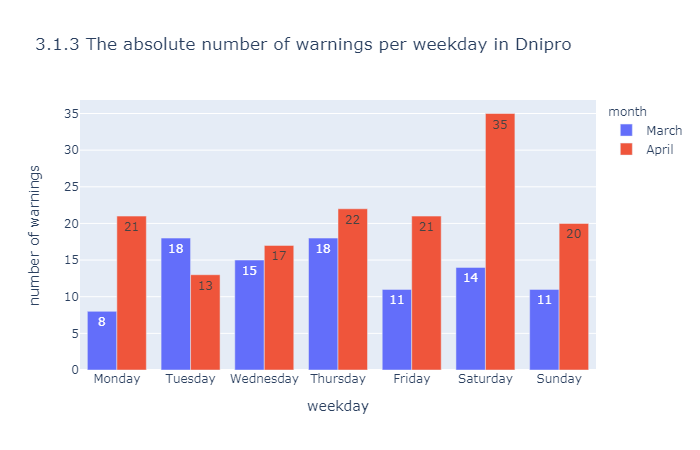

In [9]:
# selecting
weekday = df_region[['weekday_num', 'weekday', 'unique_warning', 'month', 'month_num']]
# grouping 
weekday = weekday.groupby(by=['month_num', 'month','weekday_num', 'weekday']).sum()
weekday = weekday.reset_index()
# printing
weekday['number of warnings'] = weekday['unique_warning']
weekday_bar =  px.bar(weekday, x="weekday", y="number of warnings", color="month", barmode="group", 
                     title=f'3.1.3 The absolute number of warnings per weekday in {region}',
                     text='number of warnings')
weekday_bar.show('png')

#### 3.1.4 Median number of warnings per weekday
We count the median

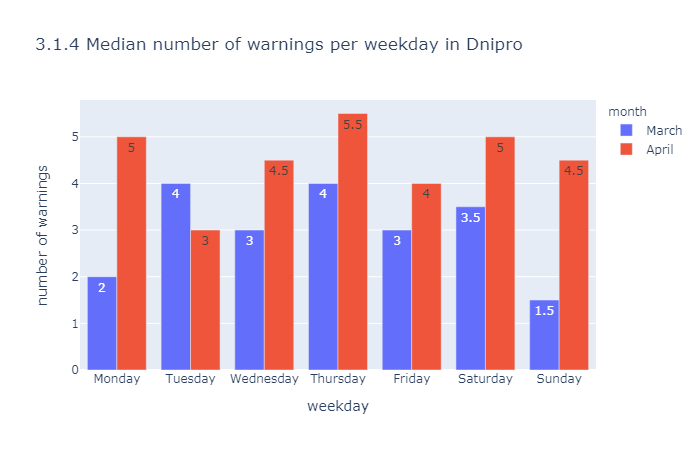

In [10]:
# selecting
weekday = df_region[['weekday_num', 'weekday', 'unique_warning', 'month', 'month_num', 'war_day']] # addedwarday
# grouping 1
weekday = weekday.groupby(by=['month_num', 'month','weekday_num', 'weekday', 'war_day']).sum()
weekday = weekday.reset_index()
# grouping 2
weekday = weekday.groupby(by=['month_num', 'month','weekday_num', 'weekday']).median()
weekday = weekday.reset_index()
# printing
weekday['number of warnings'] = weekday['unique_warning']
weekday_bar =  px.bar(weekday, x="weekday", y="number of warnings", color="month", barmode="group",
                     title=f'3.1.4 Median number of warnings per weekday in {region}',
                     text='number of warnings',)
weekday_bar.show('png')

#### 3.1.5 Distribution of warnings per weekday per months


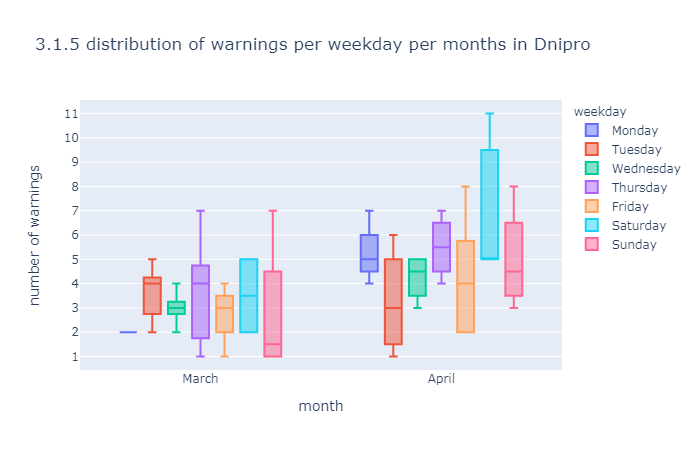

In [11]:
# selecting
weekday = df_region[['weekday_num', 'weekday', 'unique_warning', 'month', 'month_num', 'war_day']] # addedwarday
# grouping 1
weekday = weekday.groupby(by=['month_num', 'month','weekday_num', 'weekday', 'war_day']).sum()
weekday = weekday.reset_index()
# printing
weekday['number of warnings'] = weekday['unique_warning']
weekday_boxplot = px.box(weekday, x='month' ,y="number of warnings", color="weekday", 
                        title=f'3.1.5 distribution of warnings per weekday per months in {region}')
weekday_boxplot.update_yaxes(tick0=0, dtick=1)
weekday_boxplot.show('png')

#### 3.1.6 Absolute number of warnings per every hour per month

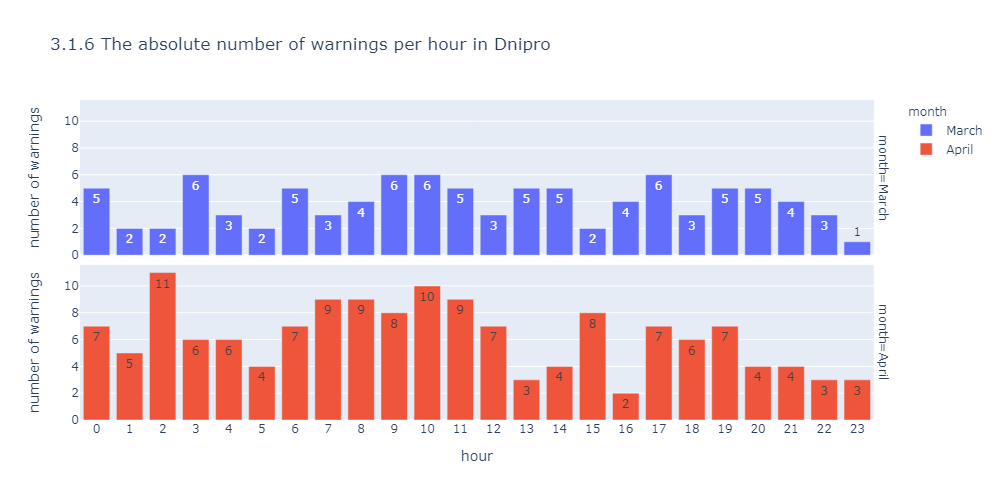

In [12]:
# selecting
hour = df_region[['hour', 'unique_warning', 'month', 'month_num']]
# grouping 
hour = hour.groupby(by=['month_num', 'month','hour']).sum()
hour = hour.reset_index()
hour['number of warnings'] = hour['unique_warning']
hour_bar =  px.bar(hour, x="hour", y="number of warnings", color="month",  facet_row="month",
                     title=f'3.1.6 The absolute number of warnings per hour in {region}',
                     text='number of warnings')
hour_bar.update_xaxes(tick0=0, dtick=1)
hour_bar.update_yaxes(tick0=0, dtick=2)
hour_bar.show('png', width=1000, height=500)

### 3.2 Analysis of duration of warnings
#### 3.2.1 Absolute duration by days of war

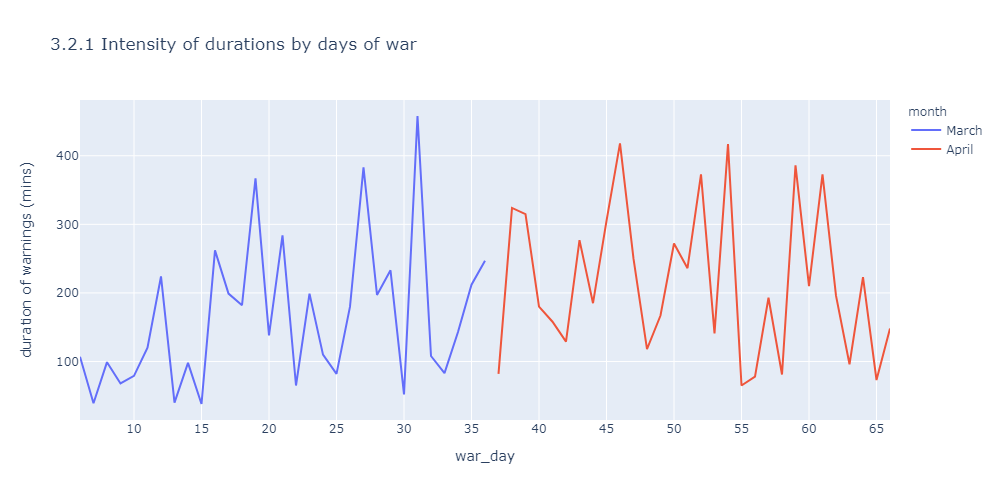

In [13]:
# selecting 
warday = df_region[['month','war_day', 'time_delta_min']]
# grouping
warday = warday.groupby(by=['war_day', 'month']).sum()
warday = warday.reset_index()
# plotting
warday['duration of warnings (mins)'] = warday['time_delta_min']
warday_line =  px.line(warday, x='war_day', y="duration of warnings (mins)", color="month", 
                       title='3.2.1 Intensity of durations by days of war')
warday_line.update_xaxes(tick0=5, dtick=5)
warday_line.show('png', width=1000, height=500)

#### 3.2.2 Absolute time of duration of warnings per month

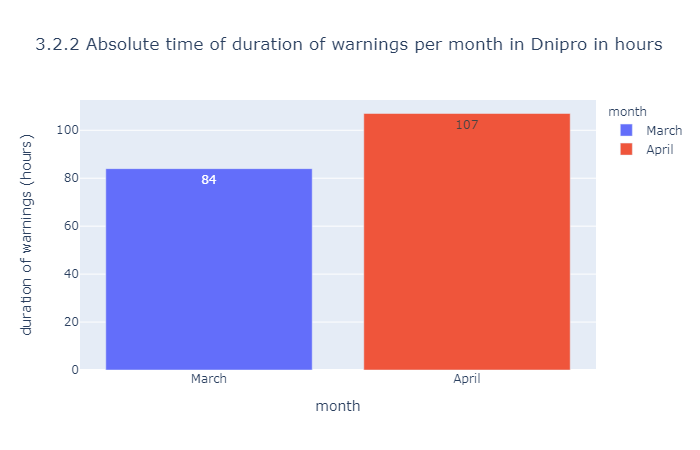

In [14]:
# selecting
month = df_region[['time_delta_min', 'month', 'month_num']]
# grouping 
month = month.groupby(by=['month_num', 'month']).sum()
month = month.reset_index()
# printing
month['duration of warnings (hours)'] = month['time_delta_min'] // 60 # view in hours
month_bar =  px.bar(month, x="month", y="duration of warnings (hours)", color="month", text='duration of warnings (hours)',
                     title=f'3.2.2 Absolute time of duration of warnings per month in {region} in hours')
month_bar.show('png')

#### 3.2.3 Median and mean duration of one warning by days of war

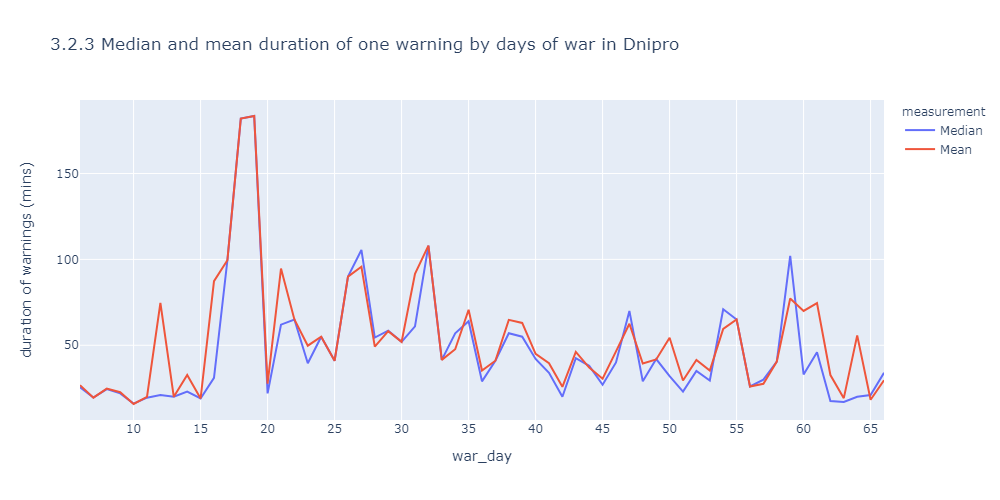

In [15]:
# selecting 
warday = df_region[['month','war_day', 'time_delta_min']].copy()
# grouping median
warday_median = warday.groupby(by=['war_day', 'month']).median()
warday_median['measurement'] = 'Median'
# grouping mean
warday_mean = warday.groupby(by=['war_day', 'month']).mean()
warday_mean['measurement'] = 'Mean'
# union
warday = pd.concat([warday_median, warday_mean])
warday = warday.reset_index()
# plotting
warday['duration of warnings (mins)'] = warday['time_delta_min']
warday_line_mean =  px.line(warday, x='war_day', y="duration of warnings (mins)", color="measurement",
                           title=f'3.2.3 Median and mean duration of one warning by days of war in {region}',
                           )
warday_line_mean.update_xaxes(tick0=5, dtick=5)
warday_line_mean.show('png', width=1000, height=500)

#### 3.2.4 Median time of warnings per weekday

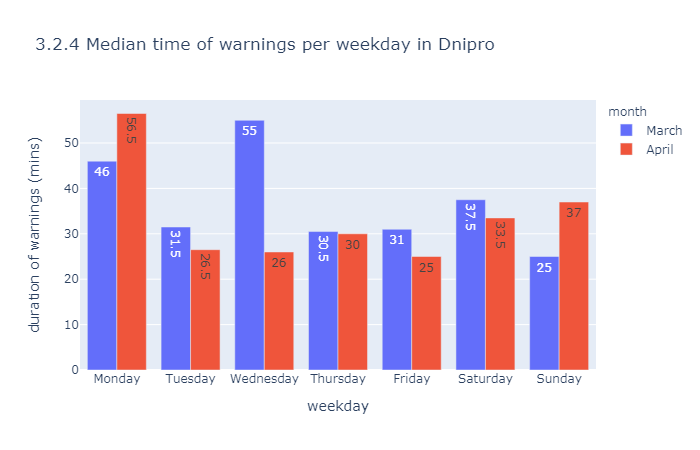

In [16]:
# selecting
weekday = df_region[['weekday_num', 'weekday', 'time_delta_min', 'month', 'month_num']] # addedwarday
# grouping 1
weekday = weekday.groupby(by=['month_num', 'month','weekday_num', 'weekday']).median()
weekday = weekday.reset_index()
# printing
weekday['duration of warnings (mins)'] = weekday['time_delta_min']
weekday_bar =  px.bar(weekday, x="weekday", y="duration of warnings (mins)", color="month", barmode="group",
                     title=f'3.2.4 Median time of warnings per weekday in {region}', 
                     text='duration of warnings (mins)',
                     )
weekday_bar.show('png')

#### 3.2.5 Distribution of absolute time in warnings per weekday per months

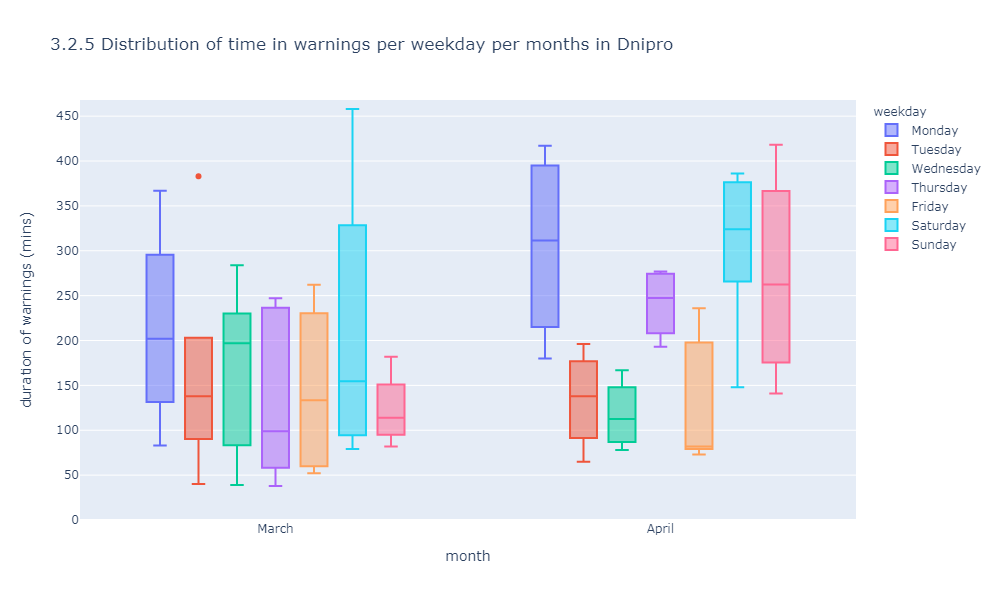

In [17]:
# selecting
weekday = df_region[['weekday_num', 'weekday', 'time_delta_min', 'month', 'month_num', 'war_day']] # addedwarday
# grouping 1
weekday = weekday.groupby(by=['month_num', 'month','weekday_num', 'weekday', 'war_day']).sum()
weekday = weekday.reset_index()
weekday
# printing
weekday['duration of warnings (mins)'] = weekday['time_delta_min']
weekday_boxplot = px.box(weekday, x='month' ,y="duration of warnings (mins)", color="weekday", 
                        title=f'3.2.5 Distribution of time in warnings per weekday per months in {region}',
                        )
weekday_boxplot.update_yaxes(tick0=0, dtick=50)
weekday_boxplot.update_yaxes(range = [0,weekday['duration of warnings (mins)'].max()+10])
weekday_boxplot.show('png', width=1000, height=600)

#### 3.2.6 Distribution of time of 1 warning per weekday per months

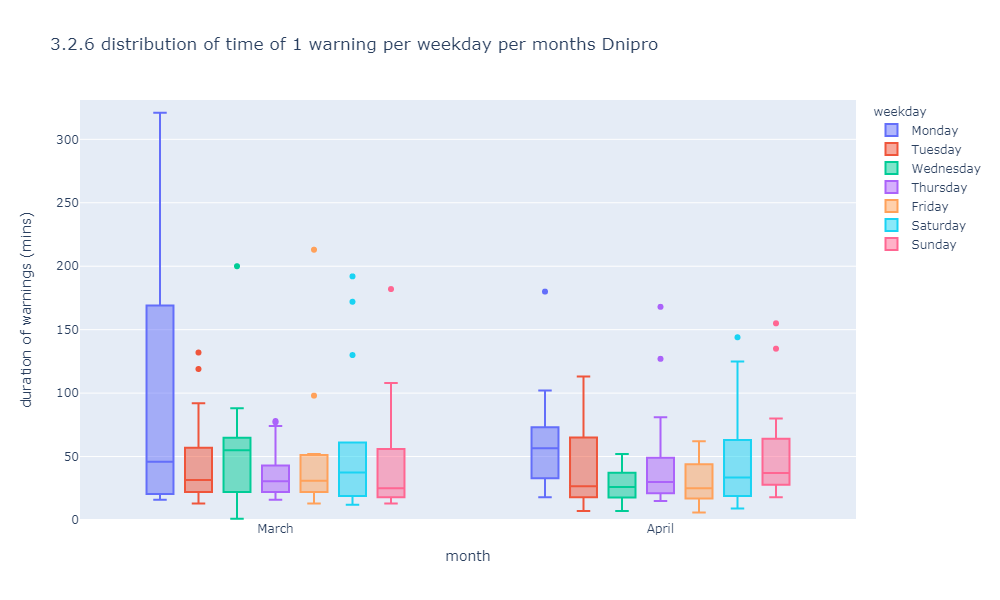

In [18]:
# selecting
weekday = df_region[['weekday_num', 'weekday', 'time_delta_min', 'month', 'month_num', 'war_day']] # added warday
weekday = weekday[pd.isna(weekday['time_delta_min']) == False].sort_values(by=['month_num', 'month', 'weekday_num', 'weekday'])

# printing
weekday['duration of warnings (mins)'] = weekday['time_delta_min']
weekday_boxplot = px.box(weekday, x='month' ,y="duration of warnings (mins)", color="weekday", 
                        title=f'3.2.6 distribution of time of 1 warning per weekday per months {region}')
weekday_boxplot.update_yaxes(tick0=0, dtick=50)
weekday_boxplot.update_yaxes(range = [0,weekday['duration of warnings (mins)'].max()+10])
weekday_boxplot.show('png', width=1000, height=600)

#### 3.2.7 Histogram of times of 1 warning 
Shows the distribution of time of 1 warning in months

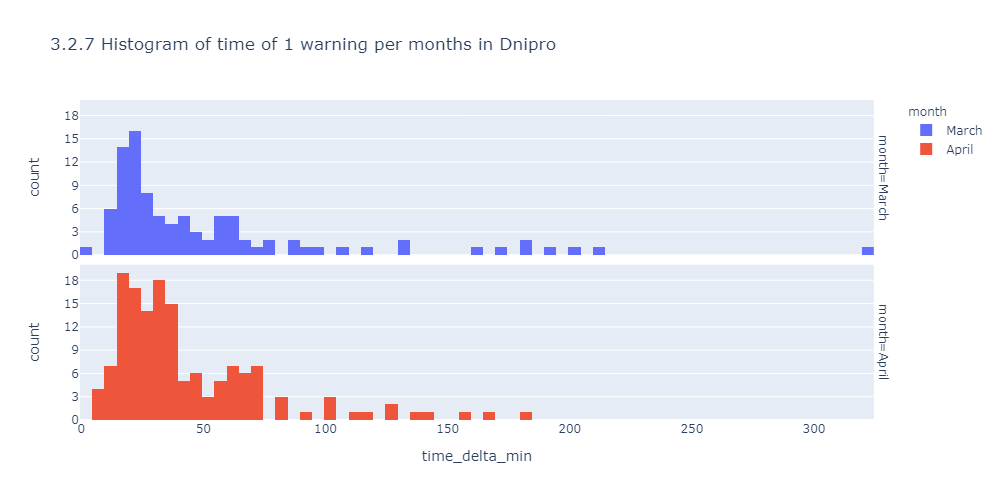

In [19]:
# selecting
month_dist = df_region[['weekday_num', 'weekday', 'time_delta_min', 'month', 'month_num', 'war_day']] # added warday
month_dist = month_dist[pd.isna(month_dist['time_delta_min']) == False].sort_values(by=['month_num', 'month'])
# printing
hist = px.histogram(month_dist, x="time_delta_min", color="month", nbins=100, marginal="box" , facet_row="month",
                   title=f'3.2.7 Histogram of time of 1 warning per months in {region}')
hist.update_xaxes(tick0=0, dtick=50)
hist.update_yaxes(tick0=0, dtick=3)
hist.show('png', width=1000, height=500)

#### 3.2.8 The median duration of warnings started in defined hour
i.e. The air warning which started at 5 pm in median will be 30 mins long

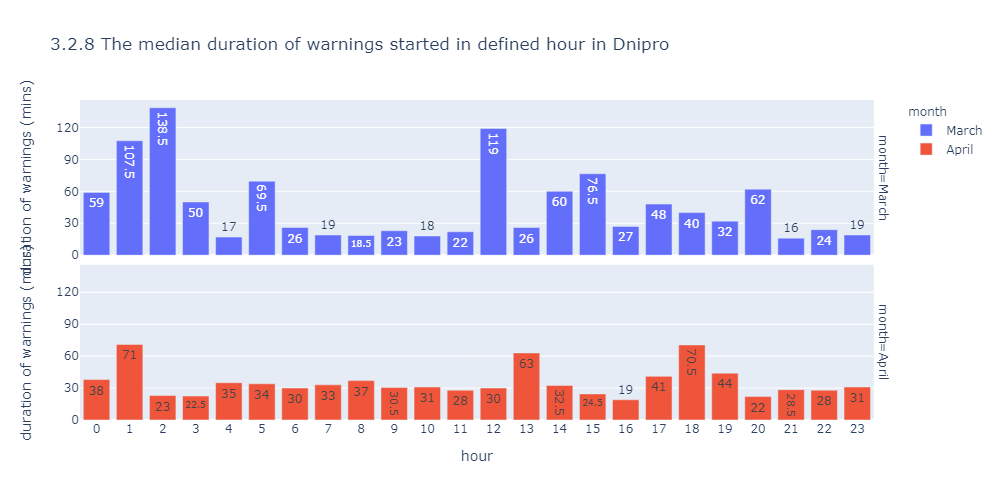

In [20]:
# selecting
hour = df_region[['hour', 'last_end','unique_warning', 'month', 'month_num', 'time_delta_min']].copy()
hour['time_delta_min'] = hour['time_delta_min'].fillna(method='ffill')
hour = hour[hour['unique_warning'] == True].copy()
# # grouping 
hour = hour.groupby(by=['month_num', 'month','hour']).median()
hour = hour.reset_index()
# printing
hour['duration of warnings (mins)'] = hour['time_delta_min']
hour_bar =  px.bar(hour, x="hour", y="duration of warnings (mins)", color="month",  facet_row="month",
                     title=f'3.2.8 The median duration of warnings started in defined hour in {region}',
                    text='duration of warnings (mins)')
hour_bar.update_xaxes(tick0=0, dtick=1)
hour_bar.update_yaxes(tick0=0, dtick=30)
hour_bar.show('png', width=1000, height=500)

#### 3.2.9 Kaplan Meier's probability model of time distributions of

In [21]:
# function of counting the Kaplan Meier
def kaplan_meier(df, duration_column='', event_column=''):
    df = df[df[duration_column] > 0]
    durations = df.sort_values(duration_column)[duration_column].unique()
    # Initialise the table
    columns = ['duration', 'n_at_risk', 'n_events', 
               'survival_probability']
    km = pd.DataFrame(columns=columns, dtype=np.number)
    km = km.append(pd.DataFrame([[0, df.shape[0], 0, 1]], 
                                    columns=columns))
    # Calculate survival probability for each duration
    for i, t in enumerate(durations):
        n = np.sum(df[duration_column]>=t)
        d = np.sum((df[duration_column]==t) & (df[event_column]==True))
        s = (1 - d / n) * km.loc[i, 'survival_probability']
        km = km.append(pd.DataFrame([[t, n, d, s]], 
                                    index=[i+1],
                                    columns=columns))
#         km = km[(pd.isna(km['survival_probability']) == False)]
    return km

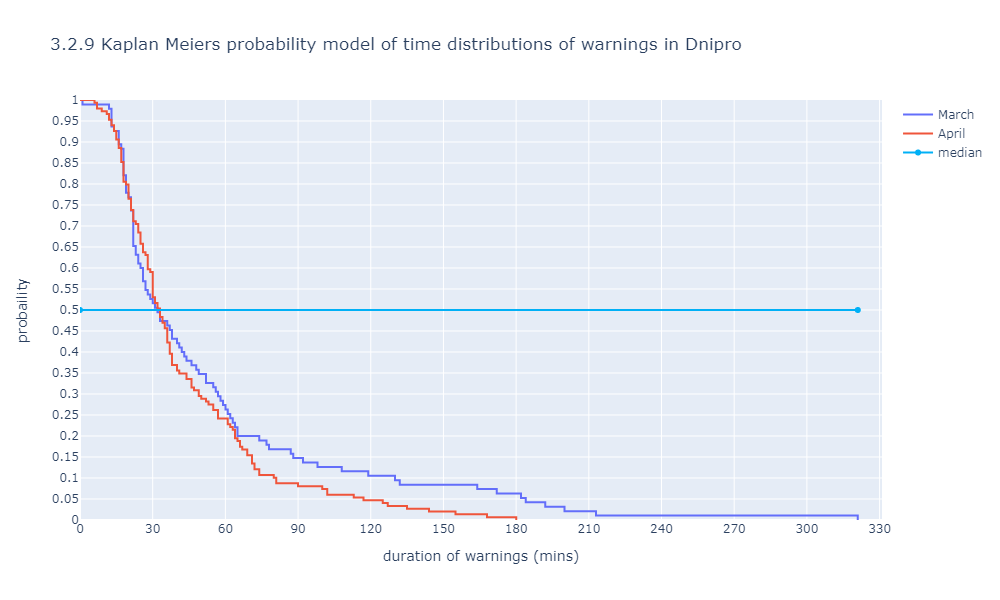

In [22]:
# seleting necessary values
# per all time
df_km = df_region[['time_delta_min', 'last_end']]
df_km = df_km[(df_km['last_end'] == True) & (df_km['time_delta_min'] > 0)]
df_km['survival_probability'] = 1
df_km['event'] = 1
df_km.index = range(0, df_km.shape[0])

# per month
df_km_march = df_region[df_region['month']=='March']
df_km_april = df_region[df_region['month']=='April']

# counting the Kaplan Meier probability
km_march = kaplan_meier(df_km_march, duration_column='time_delta_min', event_column='last_end')
km_april = kaplan_meier(df_km_april, duration_column='time_delta_min', event_column='last_end')
# creating the plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=km_march['duration'], 
                         y=km_march['survival_probability'],
                    line_shape='hv', name=f'March'))
fig.add_trace(go.Scatter(x=km_april['duration'], 
                         y=km_april['survival_probability'],
                    line_shape='hv', name=f'April'))
fig.add_trace(go.Scatter(x=np.array([0, km_march['duration'].max()]), y=np.array([0.5, 0.5]), name="median",
                    line_shape='linear', line_color='rgb(0,176,246)'))
# fig.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=16))
fig.update_layout(title=f'3.2.9 Kaplan Meiers probability model of time distributions of warnings in {region}', 
                  xaxis_title='duration of warnings (mins)',
                  yaxis_title='probaility',
                  xaxis_range=[0, np.max((km_april['duration'].max(), km_march['duration'].max()))+10],
                  yaxis_range=[0, 1])
fig.update_yaxes(tick0=0, dtick=0.05)
fig.update_xaxes(tick0=0, dtick=30)
fig.show('png', width=1000, height=600)

#### 3.2.10 Scatter of durations and number of warnings

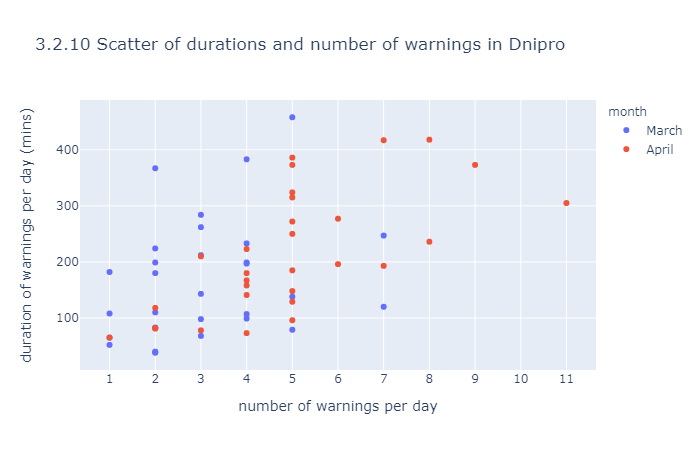

In [23]:
# selecting
df_regr = df_region[['month_num', 'month', 'war_day','unique_warning', 'time_delta_min']]

# grouping 1
wardays_warnings = df_regr[['month_num', 'month', 
                            'war_day','unique_warning']].groupby(by=['month_num', 'month', 'war_day']).sum()
# grouping 2
wardays_durations = df_regr[['month_num', 'month', 
                            'war_day','time_delta_min']].groupby(by=['month_num', 'month', 'war_day']).sum()
# joinings
df_durations_warnings = pd.merge(left=wardays_warnings, right=wardays_durations,
                                         left_index=True, right_index=True)
df_durations_warnings = df_durations_warnings.reset_index()
df_durations_warnings['duration of warnings per day (mins)'] = df_durations_warnings['time_delta_min']
df_durations_warnings['number of warnings per day'] = df_durations_warnings['unique_warning']
# printing the figure
fig = px.scatter(df_durations_warnings, x='number of warnings per day', y='duration of warnings per day (mins)',
                 color='month', title=f'3.2.10 Scatter of durations and number of warnings in {region}')
fig.update_yaxes(tick0=0, dtick=100)
fig.update_xaxes(tick0=5, dtick=1)
fig.show('png')

#### Scope
Now we can see that situation in Dnipro with air warnings in March is better than is in April. It has relationship to news from North that Russian army lossed the battle of Kyiv and overdislocated to South and East of Ukraine for attacking the OUF zone in which Dnipro region has overall borders. 
For our hopes russians will suck our cock